In [1]:
import numpy as np
import pandas as pd

import os, sys
import matplotlib.pylab as plt
import matplotlib

colors = ["#f50c0c","#ff890a", "#fcba03", "#52e010", "#1fcfae", "#1028de", "#cb07ed", "#d60439"]

In [2]:
fps = 17
height = 3400
width = 3400
total_duration_frames = 31 * 60 * fps

In [3]:
group_data = pd.read_csv("E:/Masters Study material/Masters in fish biology aquaculture and fisheries/Master Thesis/Sheets/ComplexLearning_MastersThesis_GroupPerformance.csv")
schedule = pd.read_csv("E:/Masters Study material/Masters in fish biology aquaculture and fisheries/Master Thesis/Sheets/ComplexLearning_MastersThesis_Experimental_overview.csv")





In [4]:
group_data.head()

,filename,recID,date,time,treatment,group_id,door_color,frame#,IN/OUT(1/-1),info,note
0,rec_0000_group_task_groupid_003_treatment_dddd...,0,20220803,142456,dddd,3,NaN,0.0,0.0,NaN,with_door
1,rec_0001_group_task_groupid_001_treatment_cccc...,1,20220803,152609,cccc,1,NaN,0.0,0.0,NaN,with_door
2,rec_0002_group_task_groupid_002_treatment_ccdd...,2,20220803,162700,ccdd,2,NaN,0.0,0.0,NaN,with_door
3,rec_0003_group_task_groupid_005_treatment_cccc...,3,20220803,170921,cccc,5,NaN,0.0,0.0,NaN,with_door
4,rec_0004_group_task_groupid_008_treatment_ccdd...,4,20220805,111130,ccdd,8,NaN,0.0,0.0,NaN,with_door


In [7]:
treatment_dddd = group_data["treatment"] == "dddd"
treatment_cccc = group_data["treatment"] == "cccc"
treatment_ccdd = group_data["treatment"] == "ccdd"
treatment_nnnn = group_data["treatment"] == "nnnn"


In [12]:
treatment_dddd.shape
treatment_cccc.shape
treatment_ccdd.shape
treatment_nnnn.shape

(1198,)

In [14]:
for group_id in np.unique(group_data["group_id"]):
    group_df=group_data[group_data["group_id"]==group_id]
    print(len(group_df[group_df["IN/OUT(1/-1)"]==1]))

0
0
0
15
0
22
0
59
19
59
33
18
33
39
32
18
39
76
34
3
34
10
8
5
6
19
8
2
22


In [54]:
treatment_index.head()

,filename,recID,date,time,treatment,group_id,door_color,frame#,IN/OUT(1/-1),info,note
5,rec_0005_group_task_groupid_010_treatment_nnnn...,5,20220805,115225,nnnn,10,NaN,0.0,0.0,NaN,with_door
86,rec_0013_group_task_groupid_024_treatment_nnnn...,13,20220812,135431,nnnn,24,R,8332.0,1.0,NaN,without_door
87,rec_0013_group_task_groupid_024_treatment_nnnn...,13,20220812,135431,nnnn,24,R,9520.0,-1.0,NaN,without_door
88,rec_0013_group_task_groupid_024_treatment_nnnn...,13,20220812,135431,nnnn,24,Y,22969.0,1.0,NaN,without_door
89,rec_0013_group_task_groupid_024_treatment_nnnn...,13,20220812,135431,nnnn,24,Y,23717.0,-1.0,NaN,without_door


In [17]:
for group_id in np.unique(group_data["group_id"]):
    group_df=group_data[group_data["group_id"]==group_id]
    print(len(group_df[group_df["IN/OUT(1/-1)"]==-1]))

0
0
0
15
0
22
0
55
19
50
29
18
31
36
32
14
32
77
31
3
34
10
8
5
6
19
8
2
22


In [55]:
color_door_index = group_data["door_color"] == "Y"
color_door_index = group_data["door_color"] == "G"
color_door_index = group_data["door_color"] == "R"
color_door_index = group_data["door_color"] == "B"
color_door_index = group_data[color_door_index]

In [56]:
color_door_index.shape

(320, 11)

In [57]:
color_door_index.head()

,filename,recID,date,time,treatment,group_id,door_color,frame#,IN/OUT(1/-1),info,note
24,rec_0006_group_task_groupid_015_treatment_dddd...,6,20220810,112732,dddd,15,B,29922.0,1.0,NaN,without_door
25,rec_0006_group_task_groupid_015_treatment_dddd...,6,20220810,112732,dddd,15,B,29959.0,1.0,NaN,without_door
26,rec_0006_group_task_groupid_015_treatment_dddd...,6,20220810,112732,dddd,15,B,29994.0,1.0,NaN,without_door
27,rec_0006_group_task_groupid_015_treatment_dddd...,6,20220810,112732,dddd,15,B,30010.0,1.0,NaN,without_door
48,rec_0008_group_task_groupid_013_treatment_cccc...,8,20220810,134145,cccc,13,B,29549.0,1.0,NaN,without_door


In [58]:
dummy_time_series = np.zeros(total_duration_frames)

In [59]:
print(dummy_time_series)

[0. 0. 0. ... 0. 0. 0.]


In [1]:
dummy_time_series[29922]

NameError: name 'dummy_time_series' is not defined

KeyError: 'color_door_index'

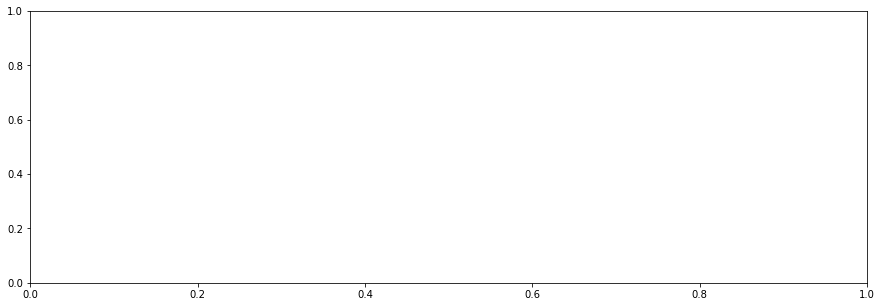

In [49]:
fig,ax = plt.subplots(figsize=(15,5))

for file_name in group_data["color_door_index"]:
    color_door_index = group_data["color_door_index"] == color_door_index
    treatment_index = group_data[treatment_index]
    dummy_time_series = np.zeros(total_duration_frames)
    counter = 0
    for event in treatment_index["frame#"]:
        if np.isnan(treatment_index["IN/OUT(1/-1)"].to_numpy()[counter]) == True:
            continue
        dummy_time_series[int(event)] = treatment_index["IN/OUT(1/-1)"].to_numpy()[counter]
        counter = counter + 1
    ax.plot(dummy_time_series)
plt.show()

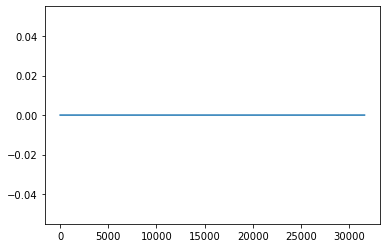

In [38]:
plt.plot(dummy_time_series)